Import necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression

Generate a real dataset with noise

In [2]:
np.random.seed(42)
X, y = make_regression(n_samples=100, n_features=1, noise=20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Standardize features for better visualization

In [3]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Train models: Without regularization (Linear Regression) and With L2 regularization (Ridge Regression)

In [4]:
model_no_reg = LinearRegression()
model_l2_reg = Ridge(alpha=10)  # Higher alpha increases regularization

model_no_reg.fit(X_train_scaled, y_train)
model_l2_reg.fit(X_train_scaled, y_train)

Ridge(alpha=10)

Predictions

In [5]:
y_pred_no_reg = model_no_reg.predict(X_test_scaled)
y_pred_l2_reg = model_l2_reg.predict(X_test_scaled)

Visualization

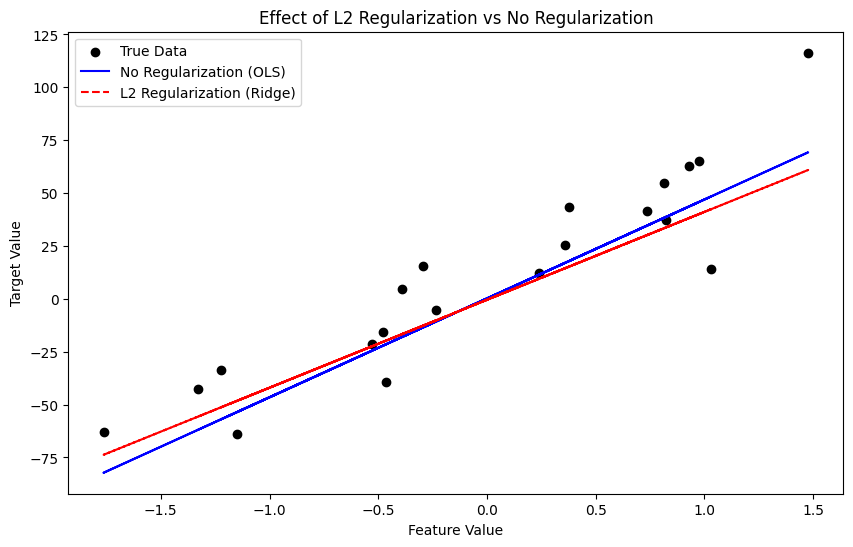

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='black', label='True Data')
plt.plot(X_test, y_pred_no_reg, label='No Regularization (OLS)', color='blue')
plt.plot(X_test, y_pred_l2_reg, label='L2 Regularization (Ridge)', color='red', linestyle='dashed')
plt.xlabel('Feature Value')
plt.ylabel('Target Value')
plt.title('Effect of L2 Regularization vs No Regularization')
plt.legend()
plt.show()


- Ordinary Least Squares (OLS) fits the data without any penalty term:  L(w) = ||y - Xw||^2

- Ridge Regression adds an L2 penalty:  L̃(w) = ||y - Xw||^2 + α||w||^2

    - The effect of L2 regularization is to shrink the coefficients, reducing model complexity and overfitting.
    - Higher alpha values force weights to be smaller, making the model more stable but possibly underfitting.

Key Observations:

    - Without regularization, the model might overfit, leading to large coefficient values.
    - With L2 regularization, coefficients shrink, and the model generalizes better (shown in red).
    - This ensures that only important features are assigned significant weights.